In [1]:
import numpy as np

In this file, we will set up a pipeline for
1. Collecting data for an experiment
2. Processing the data
3. Running a machine learrning algorithm.
4. Evaluating the algorithm
5. Choosing the best algorithm and hyperparameters\

The main questions we need to answer are
1. How will data be collected?
2. How much data would we need?
3. What algorithm would be best? 
4. How would the amount of data influence algorithm selection?
5. How robust is our procedure to assumptions?

# Data collection

Here we want to call a simulator that collects data for us. The simulator can be arbitrary, but we would normally wish to have a specific API for calling it. In the simplest case, the only input parameter is the amount of data.

In [2]:
import data_generator

# Obtain data from the data generator. 
# In this case, the data generator gives us a random sample. Other sampling methodologies are possible, of course.
generator = data_generator.GaussianClassificationGenerator(2, np.array([0.3, 0.7]))

# Data processing

Here we perform preliminary processing of the data, if necessary. In particular, we may want to split the data in training, validation and test sets. Other standard pre-processing includes scaling the data, dealing with missing data, and removal of problematic data points. However, all of these could theoretically be dealt within the learning algorithm itself.

In [3]:
def process_data(X, Y):
    import sklearn.model_selection
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,Y)
    return X_train, X_test, y_train, y_test


# Evaluation

Here we run an ML algorithm, using the data for finding appropriate parameters. It is best to have a unified interface for doing this as well. 

In [4]:
# get a Trained model
def Train(clf, X_train, y_train):
    clf.fit(X_train, y_train) # Common API for classifiers in sklearn
    return clf

In [5]:
from sklearn.metrics import accuracy_score
def Evaluate(clf, X_test, y_test):
    y_pred = clf.predict(X_test) # Common API
    accuracy = accuracy_score(y_pred, y_test)
    return accuracy

In [6]:
# The experiment setup

In [33]:
n_data = 100 # how much data would we have - this can vary to see how much data we need
n_experiments = 100 # More experiments give us higher faith in the result
n_evaluation_data = 10000 # this number should be relatively large to get good estimates

## Setup
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
models = [svm.SVC(gamma=0.01, C=100),
         LogisticRegression(random_state=0),
         MLPClassifier(random_state=1, max_iter=300)]
n_models = len(models)
score = np.zeros([n_models, n_experiments])
real_score = np.zeros([n_models, n_experiments])

[X_eval, y_eval] = generator.generate(n_evaluation_data) # data is generated here only to evaluate the pipeline

# The point of the experiment is to evaluate the models and select the best
for i in range(n_experiments):
    print ("Experiment ", i);
    print ("------------");
    [X, Y] = generator.generate(n_data) # data is generated here
    [X_train, X_test, y_train, y_test] = process_data(X, Y) # processing also splits the data in two parts
    k = 0
   
    for model in models:
        Train(model, X_train, y_train)
        score[k,i] = Evaluate(model, X_test, y_test)
        real_score[k,i] = Evaluate(model, X_eval, y_eval)
        print(model, score[k,i], real_score[k,i])
        k+=1
        

Experiment  0
------------
SVC(C=100, gamma=0.01) 0.84 0.8157
LogisticRegression(random_state=0) 0.68 0.6985
MLPClassifier(max_iter=300, random_state=1) 0.8 0.874
Experiment  1
------------
SVC(C=100, gamma=0.01) 0.84 0.8147
LogisticRegression(random_state=0) 0.76 0.6981


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.84 0.8676
Experiment  2
------------
SVC(C=100, gamma=0.01) 0.88 0.8055
LogisticRegression(random_state=0) 0.76 0.6981
MLPClassifier(max_iter=300, random_state=1) 0.84 0.8602
Experiment  3
------------
SVC(C=100, gamma=0.01) 0.76 0.7892
LogisticRegression(random_state=0) 0.72 0.726


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.88 0.8573
Experiment  4
------------
SVC(C=100, gamma=0.01) 0.84 0.8126
LogisticRegression(random_state=0) 0.68 0.6981
MLPClassifier(max_iter=300, random_state=1) 0.84 0.8544
Experiment  5
------------
SVC(C=100, gamma=0.01) 0.76 0.8295
LogisticRegression(random_state=0) 0.72 0.597


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.8 0.852
Experiment  6
------------
SVC(C=100, gamma=0.01) 0.76 0.8151
LogisticRegression(random_state=0) 0.64 0.7019
MLPClassifier(max_iter=300, random_state=1) 0.76 0.8614
Experiment  7
------------
SVC(C=100, gamma=0.01) 0.84 0.8205
LogisticRegression(random_state=0) 0.84 0.7495


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.84 0.8709
Experiment  8
------------
SVC(C=100, gamma=0.01) 0.76 0.8038
LogisticRegression(random_state=0) 0.64 0.7266
MLPClassifier(max_iter=300, random_state=1) 0.84 0.8515
Experiment  9
------------
SVC(C=100, gamma=0.01) 0.72 0.7962
LogisticRegression(random_state=0) 0.72 0.7909


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.8 0.839
Experiment  10
------------
SVC(C=100, gamma=0.01) 0.72 0.8121
LogisticRegression(random_state=0) 0.6 0.734
MLPClassifier(max_iter=300, random_state=1) 0.72 0.8667
Experiment  11
------------
SVC(C=100, gamma=0.01) 0.6 0.7992
LogisticRegression(random_state=0) 0.68 0.7409


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.64 0.8399
Experiment  12
------------
SVC(C=100, gamma=0.01) 0.88 0.8035
LogisticRegression(random_state=0) 0.88 0.7841
MLPClassifier(max_iter=300, random_state=1) 0.88 0.8465
Experiment  13
------------
SVC(C=100, gamma=0.01) 0.84 0.7976
LogisticRegression(random_state=0) 0.84 0.7181


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.8 0.8577
Experiment  14
------------
SVC(C=100, gamma=0.01) 0.92 0.7833
LogisticRegression(random_state=0) 0.88 0.7202
MLPClassifier(max_iter=300, random_state=1) 0.92 0.8068
Experiment  15
------------
SVC(C=100, gamma=0.01) 0.84 0.7988
LogisticRegression(random_state=0) 0.8 0.7526


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.84 0.8393
Experiment  16
------------
SVC(C=100, gamma=0.01) 0.68 0.7974
LogisticRegression(random_state=0) 0.64 0.7733
MLPClassifier(max_iter=300, random_state=1) 0.72 0.8651
Experiment  17
------------
SVC(C=100, gamma=0.01) 0.68 0.7944
LogisticRegression(random_state=0) 0.56 0.6994


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.76 0.8184
Experiment  18
------------
SVC(C=100, gamma=0.01) 0.84 0.8139
LogisticRegression(random_state=0) 0.76 0.7369
MLPClassifier(max_iter=300, random_state=1) 0.84 0.8756
Experiment  19
------------
SVC(C=100, gamma=0.01) 0.88 0.8052
LogisticRegression(random_state=0) 0.84 0.6981


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.92 0.8691
Experiment  20
------------
SVC(C=100, gamma=0.01) 0.84 0.8103
LogisticRegression(random_state=0) 0.72 0.7199
MLPClassifier(max_iter=300, random_state=1) 0.88 0.8671
Experiment  21
------------
SVC(C=100, gamma=0.01) 0.76 0.7951
LogisticRegression(random_state=0) 0.68 0.7161


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.76 0.8328
Experiment  22
------------
SVC(C=100, gamma=0.01) 0.84 0.7959
LogisticRegression(random_state=0) 0.76 0.7186
MLPClassifier(max_iter=300, random_state=1) 0.84 0.8481
Experiment  23
------------
SVC(C=100, gamma=0.01) 0.76 0.8034
LogisticRegression(random_state=0) 0.64 0.6981


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.72 0.8496
Experiment  24
------------
SVC(C=100, gamma=0.01) 0.92 0.8204
LogisticRegression(random_state=0) 0.84 0.7522
MLPClassifier(max_iter=300, random_state=1) 0.88 0.8643
Experiment  25
------------
SVC(C=100, gamma=0.01) 0.88 0.8055
LogisticRegression(random_state=0) 0.76 0.7153


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.92 0.854
Experiment  26
------------
SVC(C=100, gamma=0.01) 0.88 0.7976
LogisticRegression(random_state=0) 0.76 0.6983
MLPClassifier(max_iter=300, random_state=1) 0.96 0.8531
Experiment  27
------------
SVC(C=100, gamma=0.01) 0.68 0.8325
LogisticRegression(random_state=0) 0.6 0.7024


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.84 0.8676
Experiment  28
------------
SVC(C=100, gamma=0.01) 0.88 0.79
LogisticRegression(random_state=0) 0.84 0.7081
MLPClassifier(max_iter=300, random_state=1) 0.88 0.8491
Experiment  29
------------
SVC(C=100, gamma=0.01) 0.88 0.8
LogisticRegression(random_state=0) 0.8 0.6983


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.84 0.8551
Experiment  30
------------
SVC(C=100, gamma=0.01) 0.76 0.8028
LogisticRegression(random_state=0) 0.68 0.7435
MLPClassifier(max_iter=300, random_state=1) 0.8 0.8633
Experiment  31
------------
SVC(C=100, gamma=0.01) 0.8 0.7662
LogisticRegression(random_state=0) 0.72 0.7522


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.76 0.7734
Experiment  32
------------
SVC(C=100, gamma=0.01) 0.68 0.7984
LogisticRegression(random_state=0) 0.72 0.7747
MLPClassifier(max_iter=300, random_state=1) 0.76 0.8498
Experiment  33
------------
SVC(C=100, gamma=0.01) 0.76 0.7944
LogisticRegression(random_state=0) 0.72 0.7626


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.76 0.8203
Experiment  34
------------
SVC(C=100, gamma=0.01) 0.76 0.8073
LogisticRegression(random_state=0) 0.8 0.7691
MLPClassifier(max_iter=300, random_state=1) 0.88 0.8292
Experiment  35
------------
SVC(C=100, gamma=0.01) 0.8 0.7972
LogisticRegression(random_state=0) 0.72 0.7047


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.8 0.8487
Experiment  36
------------
SVC(C=100, gamma=0.01) 0.84 0.805
LogisticRegression(random_state=0) 0.76 0.6981
MLPClassifier(max_iter=300, random_state=1) 0.84 0.8461
Experiment  37
------------
SVC(C=100, gamma=0.01) 0.72 0.7823
LogisticRegression(random_state=0) 0.64 0.7006


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.76 0.855
Experiment  38
------------
SVC(C=100, gamma=0.01) 0.84 0.8237
LogisticRegression(random_state=0) 0.8 0.7893
MLPClassifier(max_iter=300, random_state=1) 0.84 0.845
Experiment  39
------------
SVC(C=100, gamma=0.01) 0.84 0.8108
LogisticRegression(random_state=0) 0.76 0.7519


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.92 0.876
Experiment  40
------------
SVC(C=100, gamma=0.01) 0.76 0.8165
LogisticRegression(random_state=0) 0.64 0.6981
MLPClassifier(max_iter=300, random_state=1) 0.8 0.8669
Experiment  41
------------
SVC(C=100, gamma=0.01) 0.8 0.8204
LogisticRegression(random_state=0) 0.76 0.7541


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.96 0.8577
Experiment  42
------------
SVC(C=100, gamma=0.01) 0.92 0.8038
LogisticRegression(random_state=0) 0.8 0.772
MLPClassifier(max_iter=300, random_state=1) 0.84 0.8701
Experiment  43
------------
SVC(C=100, gamma=0.01) 0.72 0.7819
LogisticRegression(random_state=0) 0.72 0.7457


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.72 0.8034
Experiment  44
------------
SVC(C=100, gamma=0.01) 0.72 0.808
LogisticRegression(random_state=0) 0.64 0.6981
MLPClassifier(max_iter=300, random_state=1) 0.84 0.8671
Experiment  45
------------
SVC(C=100, gamma=0.01) 0.84 0.8075
LogisticRegression(random_state=0) 0.68 0.6475


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.96 0.8522
Experiment  46
------------
SVC(C=100, gamma=0.01) 0.84 0.806
LogisticRegression(random_state=0) 0.72 0.7018
MLPClassifier(max_iter=300, random_state=1) 0.92 0.8576
Experiment  47
------------
SVC(C=100, gamma=0.01) 0.8 0.817
LogisticRegression(random_state=0) 0.72 0.7039


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.8 0.8753
Experiment  48
------------
SVC(C=100, gamma=0.01) 0.76 0.8046
LogisticRegression(random_state=0) 0.68 0.7366
MLPClassifier(max_iter=300, random_state=1) 0.84 0.8605
Experiment  49
------------
SVC(C=100, gamma=0.01) 0.88 0.8047
LogisticRegression(random_state=0) 0.84 0.7191


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.88 0.8586
Experiment  50
------------
SVC(C=100, gamma=0.01) 0.76 0.8146
LogisticRegression(random_state=0) 0.72 0.715
MLPClassifier(max_iter=300, random_state=1) 0.88 0.8672
Experiment  51
------------
SVC(C=100, gamma=0.01) 0.88 0.8175
LogisticRegression(random_state=0) 0.76 0.7077


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.96 0.8643
Experiment  52
------------
SVC(C=100, gamma=0.01) 0.96 0.8226
LogisticRegression(random_state=0) 0.92 0.6981
MLPClassifier(max_iter=300, random_state=1) 0.96 0.8723
Experiment  53
------------
SVC(C=100, gamma=0.01) 0.84 0.8231
LogisticRegression(random_state=0) 0.84 0.7157


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.96 0.8643
Experiment  54
------------
SVC(C=100, gamma=0.01) 0.88 0.7879
LogisticRegression(random_state=0) 0.84 0.7441
MLPClassifier(max_iter=300, random_state=1) 0.92 0.8459
Experiment  55
------------
SVC(C=100, gamma=0.01) 0.68 0.7975
LogisticRegression(random_state=0) 0.64 0.6981


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.72 0.8392
Experiment  56
------------
SVC(C=100, gamma=0.01) 0.76 0.816
LogisticRegression(random_state=0) 0.72 0.7404
MLPClassifier(max_iter=300, random_state=1) 0.84 0.8697
Experiment  57
------------
SVC(C=100, gamma=0.01) 0.84 0.7894
LogisticRegression(random_state=0) 0.72 0.7057


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.96 0.859
Experiment  58
------------
SVC(C=100, gamma=0.01) 0.64 0.7924
LogisticRegression(random_state=0) 0.64 0.7493
MLPClassifier(max_iter=300, random_state=1) 0.72 0.8311
Experiment  59
------------
SVC(C=100, gamma=0.01) 0.76 0.7919
LogisticRegression(random_state=0) 0.68 0.6962


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.84 0.8446
Experiment  60
------------
SVC(C=100, gamma=0.01) 0.68 0.7857
LogisticRegression(random_state=0) 0.6 0.7182
MLPClassifier(max_iter=300, random_state=1) 0.84 0.845
Experiment  61
------------
SVC(C=100, gamma=0.01) 0.84 0.7954
LogisticRegression(random_state=0) 0.68 0.7343


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.84 0.8426
Experiment  62
------------
SVC(C=100, gamma=0.01) 0.76 0.7999
LogisticRegression(random_state=0) 0.64 0.6981
MLPClassifier(max_iter=300, random_state=1) 0.84 0.8602
Experiment  63
------------
SVC(C=100, gamma=0.01) 0.8 0.7951
LogisticRegression(random_state=0) 0.76 0.6987


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.84 0.854
Experiment  64
------------
SVC(C=100, gamma=0.01) 0.88 0.8033
LogisticRegression(random_state=0) 0.84 0.6981
MLPClassifier(max_iter=300, random_state=1) 0.96 0.8572
Experiment  65
------------
SVC(C=100, gamma=0.01) 0.8 0.8229
LogisticRegression(random_state=0) 0.68 0.7222


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.88 0.8593
Experiment  66
------------
SVC(C=100, gamma=0.01) 0.72 0.8042
LogisticRegression(random_state=0) 0.72 0.7758
MLPClassifier(max_iter=300, random_state=1) 0.8 0.8549
Experiment  67
------------
SVC(C=100, gamma=0.01) 0.72 0.8103
LogisticRegression(random_state=0) 0.64 0.6981


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.76 0.8497
Experiment  68
------------
SVC(C=100, gamma=0.01) 0.88 0.7886
LogisticRegression(random_state=0) 0.76 0.6748
MLPClassifier(max_iter=300, random_state=1) 0.96 0.8485
Experiment  69
------------
SVC(C=100, gamma=0.01) 0.76 0.815
LogisticRegression(random_state=0) 0.72 0.7588


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.8 0.8669
Experiment  70
------------
SVC(C=100, gamma=0.01) 0.8 0.794
LogisticRegression(random_state=0) 0.76 0.7063
MLPClassifier(max_iter=300, random_state=1) 0.88 0.8635
Experiment  71
------------
SVC(C=100, gamma=0.01) 0.72 0.8121
LogisticRegression(random_state=0) 0.6 0.6992


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.84 0.8668
Experiment  72
------------
SVC(C=100, gamma=0.01) 0.76 0.8077
LogisticRegression(random_state=0) 0.76 0.7052
MLPClassifier(max_iter=300, random_state=1) 0.8 0.87
Experiment  73
------------
SVC(C=100, gamma=0.01) 0.72 0.793
LogisticRegression(random_state=0) 0.64 0.6983


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.84 0.8596
Experiment  74
------------
SVC(C=100, gamma=0.01) 0.8 0.817
LogisticRegression(random_state=0) 0.72 0.7223
MLPClassifier(max_iter=300, random_state=1) 0.88 0.8731
Experiment  75
------------
SVC(C=100, gamma=0.01) 0.92 0.8006
LogisticRegression(random_state=0) 0.8 0.6985


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.96 0.8548
Experiment  76
------------
SVC(C=100, gamma=0.01) 0.92 0.8172
LogisticRegression(random_state=0) 0.88 0.7443
MLPClassifier(max_iter=300, random_state=1) 0.92 0.8706
Experiment  77
------------
SVC(C=100, gamma=0.01) 0.68 0.8202
LogisticRegression(random_state=0) 0.68 0.7647


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.84 0.856
Experiment  78
------------
SVC(C=100, gamma=0.01) 0.76 0.8184
LogisticRegression(random_state=0) 0.72 0.7013
MLPClassifier(max_iter=300, random_state=1) 0.8 0.8741
Experiment  79
------------
SVC(C=100, gamma=0.01) 0.8 0.833
LogisticRegression(random_state=0) 0.76 0.7241


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.84 0.8703
Experiment  80
------------
SVC(C=100, gamma=0.01) 0.84 0.8175
LogisticRegression(random_state=0) 0.76 0.781
MLPClassifier(max_iter=300, random_state=1) 0.8 0.8373
Experiment  81
------------
SVC(C=100, gamma=0.01) 0.88 0.7708
LogisticRegression(random_state=0) 0.76 0.707


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.92 0.8499
Experiment  82
------------
SVC(C=100, gamma=0.01) 0.76 0.8082
LogisticRegression(random_state=0) 0.68 0.7099
MLPClassifier(max_iter=300, random_state=1) 0.84 0.8714
Experiment  83
------------
SVC(C=100, gamma=0.01) 0.72 0.8158
LogisticRegression(random_state=0) 0.72 0.6986


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.8 0.8511
Experiment  84
------------
SVC(C=100, gamma=0.01) 0.72 0.7957
LogisticRegression(random_state=0) 0.68 0.7005
MLPClassifier(max_iter=300, random_state=1) 0.84 0.8377
Experiment  85
------------
SVC(C=100, gamma=0.01) 0.88 0.8249
LogisticRegression(random_state=0) 0.68 0.6981


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.84 0.8752
Experiment  86
------------
SVC(C=100, gamma=0.01) 0.8 0.7925
LogisticRegression(random_state=0) 0.72 0.7649
MLPClassifier(max_iter=300, random_state=1) 0.8 0.8639
Experiment  87
------------
SVC(C=100, gamma=0.01) 0.88 0.8139
LogisticRegression(random_state=0) 0.76 0.7182


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.8 0.8499
Experiment  88
------------
SVC(C=100, gamma=0.01) 0.92 0.7988
LogisticRegression(random_state=0) 0.84 0.7309
MLPClassifier(max_iter=300, random_state=1) 0.88 0.8619
Experiment  89
------------
SVC(C=100, gamma=0.01) 0.88 0.794
LogisticRegression(random_state=0) 0.8 0.6981


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.88 0.8339
Experiment  90
------------
SVC(C=100, gamma=0.01) 0.8 0.8182
LogisticRegression(random_state=0) 0.76 0.7411
MLPClassifier(max_iter=300, random_state=1) 0.8 0.8515
Experiment  91
------------
SVC(C=100, gamma=0.01) 0.76 0.7859
LogisticRegression(random_state=0) 0.68 0.6981


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.84 0.8663
Experiment  92
------------
SVC(C=100, gamma=0.01) 0.84 0.8122
LogisticRegression(random_state=0) 0.76 0.7467
MLPClassifier(max_iter=300, random_state=1) 0.88 0.852
Experiment  93
------------
SVC(C=100, gamma=0.01) 0.76 0.7826
LogisticRegression(random_state=0) 0.6 0.7356


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.84 0.851
Experiment  94
------------
SVC(C=100, gamma=0.01) 0.76 0.8053
LogisticRegression(random_state=0) 0.84 0.7707
MLPClassifier(max_iter=300, random_state=1) 0.88 0.8454
Experiment  95
------------
SVC(C=100, gamma=0.01) 0.88 0.7969
LogisticRegression(random_state=0) 0.88 0.7416


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.96 0.8611
Experiment  96
------------
SVC(C=100, gamma=0.01) 0.84 0.7968
LogisticRegression(random_state=0) 0.72 0.7015
MLPClassifier(max_iter=300, random_state=1) 0.84 0.8616
Experiment  97
------------
SVC(C=100, gamma=0.01) 0.8 0.79
LogisticRegression(random_state=0) 0.72 0.6981


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1) 0.92 0.8712
Experiment  98
------------
SVC(C=100, gamma=0.01) 0.88 0.8336
LogisticRegression(random_state=0) 0.72 0.7175
MLPClassifier(max_iter=300, random_state=1) 0.92 0.8765
Experiment  99
------------
SVC(C=100, gamma=0.01) 0.72 0.7863
LogisticRegression(random_state=0) 0.64 0.6794
MLPClassifier(max_iter=300, random_state=1) 0.76 0.8329


/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olethros/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [34]:
print("Average scores", np.mean(score,axis=1))
print("Actual scores", np.mean(real_score,axis=1))

Average scores [0.8008 0.7312 0.844 ]
Actual scores [0.804438 0.721423 0.854468]


In [35]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Test score distribution')

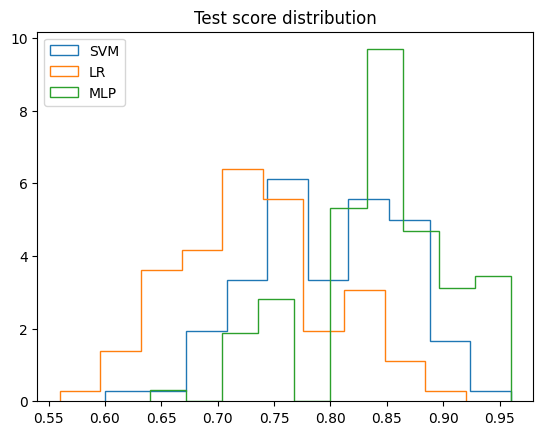

In [38]:
plt.hist(score[0], histtype="step", density=True)
plt.hist(score[1], histtype="step", density=True)
plt.hist(score[2], histtype="step", density=True)
plt.legend(["SVM", "LR", "MLP"])
plt.title("Test score distribution")


Text(0.5, 1.0, 'Actual score distribution')

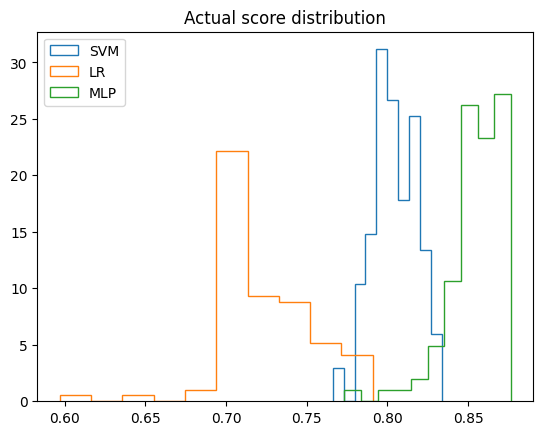

In [39]:
plt.hist(real_score[0], histtype="step", density=True)
plt.hist(real_score[1], histtype="step", density=True)
plt.hist(real_score[2], histtype="step", density=True)
plt.legend(["SVM", "LR", "MLP"])
plt.title("Actual score distribution")
